In [95]:
import requests

site_id = "site_117"  
params = "pm10cnc,pm2.5cnc"
startdate = "2021-11-01T00:00"
enddate = "2025-03-13T00:00"

# API URL
api_url = f"http://atmos.urbansciences.in/adp/v4/getDeviceDataParam/imei/{site_id}/params/{params}/startdate/{startdate}/enddate/{enddate}/ts/mm/avg/30/api/63h3AckbgtY?gaps=1&gap_value=NaN"

# Make request
response = requests.get(api_url)

# Check if request was successful
if response.status_code == 200:
    # Save CSV file
    filename = f"{site_id}_data.csv"
    with open(filename, "wb") as file:
        file.write(response.content)
    print(f"CSV file saved as: {filename}")
else:
    print(f"Error: API request failed with status code {response.status_code}")


CSV file saved as: site_117_data.csv


In [2]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from scipy.stats import skew, kurtosis, stats, shapiro

# def load_data(file_path):
#     """Load and preprocess data."""
#     df = pd.read_csv(file_path, parse_dates=["dt_time"])
#     df = df.set_index("dt_time")
#     return df

# def handle_missing_values(df):
#     """Identify and handle missing values."""
#     print("Missing values:")
#     print(df.isnull().sum())
#     return df.interpolate(method="time")

# def clean_data(df):
#     """Drop unnecessary columns."""
#     return df.drop(columns=['deviceid'], axis=1)

# def plot_histogram(df, column, bins=30):
#     """Plot histogram with KDE."""
#     plt.figure(figsize=(12,5))
#     sns.histplot(df[column], bins=bins, kde=True)
#     plt.title(f'Histogram of {column}')
#     plt.show()

# def plot_boxplot(df, column):
#     """Plot boxplot for outlier analysis."""
#     plt.figure(figsize=(6,4))
#     sns.boxplot(x=df[column])
#     plt.title(f'Boxplot of {column}')
#     plt.show()

# def calculate_statistics(df, column):
#     """Calculate skewness and kurtosis."""
#     skewness = skew(df[column])
#     kurt = kurtosis(df[column])
#     print(f"{column} Skewness: {skewness}")
#     print(f"{column} Kurtosis: {kurt}")

# def plot_qq(df, column):
#     """Plot Q-Q plot for normality check."""
#     stats.probplot(df[column], dist="norm", plot=plt)
#     plt.title(f'Q-Q Plot for {column}')
#     plt.show()

# def shapiro_wilk_test(df, column):
#     """Perform Shapiro-Wilk normality test."""
#     stat, p = shapiro(df[column])
#     print(f"Shapiro-Wilk Test: p-value for {column} =", p)

# def main():
#     file_path = "site_104_data.csv"
#     df = load_data(file_path)
#     df = handle_missing_values(df)
#     df = clean_data(df)
    
#     print(df.describe())
    
#     for column in ["pm2.5cnc", "pm10cnc"]:
#         plot_histogram(df, column)
#         plot_boxplot(df, column)
#         calculate_statistics(df, column)
#         plot_qq(df, column)
#         shapiro_wilk_test(df, column)

# if __name__ == "__main__":
#     main()


In [3]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from scipy.stats import skew,kurtosis,probplot,shapiro

In [4]:
# df = pd.read_csv("site_104_data.csv", parse_dates=["dt_time"])
# df = df.set_index("dt_time")
# print(df.isnull().sum())  # Identify missing values
# # print(df.duplicated().sum())  # Identify duplicates
# df = df.drop(axis=1,columns='deviceid')
# df.interpolate(method="time", inplace=True)  # Time-based interpolation


In [5]:
# print(df.describe())

# plt.figure(figsize=(12,5))
# sns.histplot(df['pm2.5cnc'],bins=30,kde=True)
# plt.show()

# plt.figure(figsize=(12,5))
# sns.histplot(df['pm10cnc'],bins=30,kde=True)
# plt.show()




# print("PM 2.5 Skewness:", skew(df["pm2.5cnc"]))
# print("PM 2.5 Kurtosis:", kurtosis(df["pm2.5cnc"]))
# print("PM 10 Skewness:", skew(df["pm10cnc"]))
# print("PM 10 Kurtosis:", kurtosis(df["pm10cnc"]))


# # scipy.stats.probplot(df["pm2.5cnc"], dist="norm", plot=plt)
# # plt.show()
# # scipy.stats.probplot(df["pm10cnc"], dist="norm", plot=plt)
# # plt.show()

# stat1, p1 = shapiro(df["pm2.5cnc"])
# print("Shapiro-Wilk Test: p-value for PM2.5 =", p1)

# stat2, p2 = shapiro(df["pm10cnc"])
# print("Shapiro-Wilk Test: p-value for PM10 =", p2)

In [6]:
# sns.boxplot(x=df["pm2.5cnc"])


In [7]:
# sns.boxplot(x=df["pm10cnc"])

In [8]:
# # df['dt_time'] = pd.to_datetime(df['dt_time'])
# # df = df.sort_values('timestamp')
# # df = df.set_index('timestamp')

# # -------------------------------
# # 1. Time-of-Day Features
# # -------------------------------
# # Extract hour and minute information
# df['hour'] = df.index.hour
# df['minute'] = df.index.minute

# # Cyclic encoding for hour (to capture periodicity)
# df['sin_hour'] = np.sin(2 * np.pi * df['hour'] / 24)
# df['cos_hour'] = np.cos(2 * np.pi * df['hour'] / 24)


In [9]:
# # -------------------------------
# # 2. Day-of-Week Features
# # -------------------------------
# df['day_of_week'] = df.index.dayofweek  # Monday=0, Sunday=6
# # Cyclic encoding for day-of-week (7 days period)
# df['sin_day'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
# df['cos_day'] = np.cos(2 * np.pi * df['day_of_week'] / 7)

In [10]:
# # -------------------------------
# # 3. Lagged Features
# # -------------------------------
# # Create lag features for the previous two intervals (30 minutes each)
# df['pm2.5_lag1'] = df['pm2.5cnc'].shift(1)
# df['pm2.5_lag2'] = df['pm2.5cnc'].shift(2)
# df['pm10_lag1'] = df['pm10cnc'].shift(1)
# df['pm10_lag2'] = df['pm10cnc'].shift(2)


In [11]:
# # -------------------------------
# # 4. Rolling Statistics
# # -------------------------------
# # Calculate rolling mean and standard deviation with a window of 3 intervals (1.5 hours)
# df['pm2.5_roll_mean'] = df['pm2.5cnc'].rolling(window=3, min_periods=1).mean()
# df['pm2.5_roll_std'] = df['pm2.5cnc'].rolling(window=3, min_periods=1).std()
# df['pm10_roll_mean'] = df['pm10cnc'].rolling(window=3, min_periods=1).mean()
# df['pm10_roll_std'] = df['pm10cnc'].rolling(window=3, min_periods=1).std()


In [12]:
# # -------------------------------
# # 5. Seasonal Indicators
# # -------------------------------
# # Add month and derive a season label
# df['month'] = df.index.month

# def get_season(month):
#     if month in [1, 2]:  
#         return 'Winter'
#     elif month in [3, 4, 5]:  
#         return 'Summer (Pre-Monsoon)'
#     elif month in [6, 7, 8, 9]:  
#         return 'Monsoon'
#     else:  # 10, 11, 12  
#         return 'Post-Monsoon (Autumn)'

# df['season'] = df['month'].apply(get_season)
# df['season_code'] = pd.Categorical(df['season']).codes


In [13]:
# # -------------------------------
# # 6. Holiday/Weekend Indicator
# # -------------------------------
# # Flag weekends (Saturday=5, Sunday=6)
# df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)

# # -------------------------------
# # Additional Feature: Rate of Change
# # -------------------------------
# # Calculate the difference between successive intervals to capture abrupt changes
# df['pm2.5_diff'] = df['pm2.5cnc'].diff()
# df['pm10_diff'] = df['pm10cnc'].diff()



In [14]:
# # -------------------------------
# # Re-Evaluate: Summary & Correlation
# # -------------------------------
# # print("Head of the enriched DataFrame:")
# # print(df.head())

# # print("\nSummary Statistics:")
# # print(df.describe())

# # -------------------------------
# # Clean Up
# # -------------------------------
# # Drop initial rows with NaN values from shifting and rolling calculations
# df = df.dropna()
# df = df.drop(columns=["season"])
# # df = df.interpolate().reset_index()



In [15]:
# # Plot correlation matrix to visualize relationships between features
# plt.figure(figsize=(42,30))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# plt.title("Feature Correlation Matrix")
# plt.show()



In [16]:
# columns_to_drop = [
# 'pm2.5_diff', 'pm10_diff','pm10_lag2','pm2.5_lag2', 
#     'cos_day','sin_day'
# ]
# df = df.drop(columns=columns_to_drop, axis=1)

In [17]:
#there are few irrelevant and few good features but not relevant for shorter durations.

### Isolation Forest

In [19]:
# from sklearn.ensemble import IsolationForest

# features = [
#     'pm2.5cnc', 'pm10cnc', 'pm2.5_lag1', 'pm10_lag1',
#     'pm2.5_roll_mean', 'pm10_roll_mean', 'pm2.5_roll_std', 'pm10_roll_std', 
#     'hour', 'minute', 'sin_hour', 'cos_hour', 
#     'day_of_week', 'month', 'season_code', 'is_weekend'
# ]

# X = df[features]
# iso = IsolationForest(n_estimators=100,contamination=0.05,random_state=42)
# df['anomaly_score'] = iso.fit_predict(X)

# df['is_anomaly'] = (df['anomaly_score'] == -1).astype(int)

In [20]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Scatter plot for PM2.5 with outliers
# plt.figure(figsize=(12, 6))
# sns.scatterplot(x=df.index, y=df['pm2.5cnc'], hue=df['is_anomaly'], palette={0: 'blue', 1: 'red'}, alpha=0.7)
# plt.title("PM2.5 Concentration with Anomalies")
# plt.xlabel("Time Index")
# plt.ylabel("PM2.5 Concentration")
# plt.legend(title="Anomaly", labels=["Normal", "Outlier"])
# plt.show()

# # Scatter plot for PM10 with outliers
# plt.figure(figsize=(12, 6))
# sns.scatterplot(x=df.index, y=df['pm10cnc'], hue=df['is_anomaly'], palette={0: 'blue', 1: 'red'}, alpha=0.7)
# plt.title("PM10 Concentration with Anomalies")
# plt.xlabel("Time Index")
# plt.ylabel("PM10 Concentration")
# plt.legend(title="Anomaly", labels=["Normal", "Outlier"])
# plt.show()


In [21]:
# df['is_anomaly'].unique()

In [22]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # Define different timeframes
# timeframes = {
#     "Last Hour": df.last("1H"),
#     "Last 12 Hours": df.last("12H"),
#     "Last Day": df.last("1D"),
#     "Last Week": df.last("7D"),
#     "Last Fortnight": df.last("14D"),
#     "Last Month": df.last("30D"),
#     "Last Quarter": df.last("3M"),
#     "Last Half-Year": df.last("6M"),
#     "Last Year": df.last("1Y"),
# }

# # Function to plot PM2.5 and PM10 for a given timeframe
# def plot_anomalies(time_label, data):
#     # Check if there are any outliers
#     num_outliers = data['is_anomaly'].sum()
#     print(f"{time_label}: {num_outliers} outliers detected.")

#     # PM2.5 Plot
#     plt.figure(figsize=(12, 6))
#     sns.scatterplot(x=data.index, y=data['pm2.5cnc'], hue=data['is_anomaly'], 
#                     palette={0: 'blue', 1: 'red'}, alpha=0.7)
#     plt.title(f"PM2.5 Concentration with Anomalies - {time_label}")
#     plt.xlabel("Time")
#     plt.ylabel("PM2.5 Concentration")
#     plt.legend(title="Anomaly", labels=["Normal", "Outlier"])
#     plt.xticks(rotation=45)
#     plt.show()

#     # PM10 Plot
#     plt.figure(figsize=(12, 6))
#     sns.scatterplot(x=data.index, y=data['pm10cnc'], hue=data['is_anomaly'], 
#                     palette={0: 'green', 1: 'red'}, alpha=0.7)
#     plt.title(f"PM10 Concentration with Anomalies - {time_label}")
#     plt.xlabel("Time")
#     plt.ylabel("PM10 Concentration")
#     plt.legend(title="Anomaly", labels=["Normal", "Outlier"])
#     plt.xticks(rotation=45)
#     plt.show()

# for label, subset in timeframes.items():
#     outliers = subset[subset['is_anomaly'] == 1]
#     print(f"{label}: {len(outliers)} outliers detected.")


In [23]:
# plot_anomalies("Last Month", timeframes["Last Month"])


In [24]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.ensemble import IsolationForest
# from sklearn.svm import OneClassSVM

# def get_timeframes(df):
#     """ Returns dictionary of different timeframes from the dataframe """
#     return {
#         # "Last Hour": df.last("1H"),
#         # "Last 12 Hours": df.last("12H"),
#         # "Last Day": df.last("1D"),
#         # "Last Week": df.last("7D"),
#         # "Last Fortnight": df.last("14D"),
#         "Last Month": df.last("30D"),
#         "Last Quarter": df.last("3M"),
#         "Last Half-Year": df.last("6M"),
#         "Last Year": df.last("1Y"),
#     }

# def detect_anomalies_isolation_forest(df):
#     """ Applies Isolation Forest for anomaly detection """
#     features = [
#         'pm2.5cnc', 'pm10cnc', 'pm2.5_lag1', 'pm10_lag1',
#         'pm2.5_roll_mean', 'pm10_roll_mean', 'pm2.5_roll_std', 'pm10_roll_std', 
#         'hour', 'minute', 'sin_hour', 'cos_hour', 
#         'day_of_week', 'month', 'season_code', 'is_weekend'
#     ]
#     X = df[features]

#     iso = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
#     df['anomaly_score'] = iso.fit_predict(X)
#     df['is_anomaly'] = (df['anomaly_score'] == -1).astype(int)

#     return df

# def detect_anomalies_svm(df):
#     """ Applies One-Class SVM for anomaly detection """
#     features = [
#         'pm2.5cnc', 'pm10cnc', 'pm2.5_lag1', 'pm10_lag1',
#         'pm2.5_roll_mean', 'pm10_roll_mean', 'pm2.5_roll_std', 'pm10_roll_std', 
#         'hour', 'minute', 'sin_hour', 'cos_hour', 
#         'day_of_week', 'month', 'season_code', 'is_weekend'
#     ]
#     X = df[features]

#     svm_model = OneClassSVM(nu=0.01, kernel="rbf", gamma="scale")
#     df['anomaly_score'] = svm_model.fit_predict(X)
#     df['is_anomaly'] = (df['anomaly_score'] == -1).astype(int)

#     return df

# def plot_anomalies(time_label, data):
#     """ Plots PM2.5 and PM10 concentration with anomalies """
#     if data.empty:
#         print(f"No data available for {time_label}")
#         return

#     print(f"{time_label}: {data['is_anomaly'].sum()} outliers detected.")

#     # PM2.5 Plot
#     plt.figure(figsize=(12, 6))
#     sns.scatterplot(x=data.index, y=data['pm2.5cnc'], hue=data['is_anomaly'], 
#                 palette={1: 'red'}, alpha=0.7)
#     plt.title(f"PM2.5 Concentration with Anomalies - {time_label}")
#     plt.xlabel("Time")
#     plt.ylabel("PM2.5 Concentration")
#     plt.legend(title="Anomaly", labels=["Normal", "Outlier"])
#     plt.xticks(rotation=45)
#     plt.show()

#     # PM10 Plot
#     plt.figure(figsize=(12, 6))
#     sns.scatterplot(x=data.index, y=data['pm2.5cnc'], hue=data['is_anomaly'], 
#                 palette={ 1: 'red'}, alpha=0.7)

#     plt.title(f"PM10 Concentration with Anomalies - {time_label}")
#     plt.xlabel("Time")
#     plt.ylabel("PM10 Concentration")
#     plt.legend(title="Anomaly", labels=["Normal", "Outlier"])
#     plt.xticks(rotation=45)
#     plt.show()

# def process_and_plot(df, model="isolation_forest"):
#     """ Runs anomaly detection and plots results """
#     if model == "isolation_forest":
#         df = detect_anomalies_isolation_forest(df)
#     elif model == "svm":
#         df = detect_anomalies_svm(df)
#     else:
#         raise ValueError("Invalid model specified. Choose 'isolation_forest' or 'svm'.")

#     df.to_csv(f"anomaly_detected_{model}.csv", index=False)
#     print(f"Anomaly detection completed using {model}. Results saved.")

#     timeframes = get_timeframes(df)
#     for label, subset in timeframes.items():
#         plot_anomalies(label, subset)

# # Example usage
#        # Run with One-Class SVM


In [25]:
#   # Run with Isolation Forest
# process_and_plot(df, model="svm")         

In [26]:
# process_and_plot(df, model="isolation_forest") 

In [27]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.svm import OneClassSVM

# # Define different hyperparameter combinations
# svm_configs = [
#     # {"nu": 0.01, "kernel": "rbf", "gamma": 0.1},
#     {"nu": 0.01, "kernel": "rbf", "gamma": "scale"},
#     # {"nu": 0.03, "kernel": "poly", "gamma": 0.05},
#     # {"nu": 0.05, "kernel": "sigmoid", "gamma": "auto"},
# ]

# # Select relevant features
# features = ['pm2.5cnc', 'pm10cnc', 'pm2.5_lag1', 'pm10_lag1', 'pm2.5_roll_mean', 'pm10_roll_mean']

# # Function to apply One-Class SVM and store results
# def detect_anomalies_svm(df, nu, kernel, gamma):
#     X = df[features]
#     model = OneClassSVM(nu=nu, kernel=kernel, gamma=gamma)
#     df = df.copy()  # Avoid modifying original data
#     df['anomaly_score'] = model.fit_predict(X)
#     df['is_anomaly'] = (df['anomaly_score'] == -1).astype(int)
#     return df

# # Create subplots to visualize different models
# fig, axes = plt.subplots(len(svm_configs), 2, figsize=(12, len(svm_configs) * 5))

# # Iterate through different configurations and plot results
# for i, params in enumerate(svm_configs):
#     df_result = detect_anomalies_svm(df, **params)

#     # PM2.5 Plot
#     sns.scatterplot(ax=axes[i, 0], x=df_result.index, y=df_result['pm2.5cnc'], hue=df_result['is_anomaly'],
#                     palette={0: 'blue', 1: 'red'}, alpha=0.7)
#     axes[i, 0].set_title(f"PM2.5 - nu={params['nu']}, kernel={params['kernel']}, gamma={params['gamma']}")
#     axes[i, 0].set_xlabel("Time")
#     axes[i, 0].set_ylabel("PM2.5 Concentration")

#     # PM10 Plot
#     sns.scatterplot(ax=axes[i, 1], x=df_result.index, y=df_result['pm10cnc'], hue=df_result['is_anomaly'],
#                     palette={0: 'green', 1: 'red'}, alpha=0.7)
#     axes[i, 1].set_title(f"PM10 - nu={params['nu']}, kernel={params['kernel']}, gamma={params['gamma']}")
#     axes[i, 1].set_xlabel("Time")
#     axes[i, 1].set_ylabel("PM10 Concentration")

# plt.tight_layout()
# plt.show()


### LSTM

In [29]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed, Input
# from tensorflow.keras.optimizers import Adam

# # Select relevant features
# features = ['pm2.5cnc', 'pm10cnc', 'pm2.5_lag1', 'pm10_lag1', 'pm2.5_roll_mean', 'pm10_roll_mean']
# df_filtered = df[features].dropna().copy()  # Ensure a copy to avoid warnings

# # Normalize data
# scaler = MinMaxScaler()
# scaled_data = scaler.fit_transform(df_filtered)

# # Reshape for LSTM (samples, timesteps, features)
# time_steps = 10  # Lookback window
# X = []
# indices = []  # Store valid timestamps

# for i in range(len(scaled_data) - time_steps):
#     X.append(scaled_data[i : i + time_steps])
#     indices.append(df_filtered.index[i + time_steps])  # Store corresponding timestamp

# X = np.array(X)
# indices = np.array(indices)  # Convert to NumPy array for consistency

# # Split into train & test sets
# train_size = int(len(X) * 0.8)
# X_train, X_test = X[:train_size], X[train_size:]
# indices_train, indices_test = indices[:train_size], indices[train_size:]

# # Build LSTM Autoencoder
# input_layer = Input(shape=(time_steps, X.shape[2]))
# encoder = LSTM(64, activation='relu', return_sequences=True)(input_layer)
# encoder = LSTM(32, activation='relu', return_sequences=False)(encoder)
# decoder = RepeatVector(time_steps)(encoder)
# decoder = LSTM(32, activation='relu', return_sequences=True)(decoder)
# decoder = LSTM(64, activation='relu', return_sequences=True)(decoder)
# decoder = TimeDistributed(Dense(X.shape[2]))(decoder)

# autoencoder = Model(input_layer, decoder)
# autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
# autoencoder.summary()

# # Train the model
# history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test), verbose=1)

In [30]:
# # Compute reconstruction error
# X_pred = autoencoder.predict(X)
# mse = np.mean(np.abs(X - X_pred), axis=(1, 2))

# # Define anomaly threshold
# threshold = np.percentile(mse, 85)  # 92nd percentile

# # Create a new DataFrame to store anomaly results
# anomaly_df = pd.DataFrame(index=indices)  # Use stored timestamps
# anomaly_df["mse"] = mse
# anomaly_df["is_anomaly"] = (mse > threshold).astype(int)

# # Merge with original df_filtered, ensuring alignment
# df_filtered = df_filtered.iloc[time_steps:].copy()  # Drop first 'time_steps' rows
# df_filtered["is_anomaly"] = anomaly_df["is_anomaly"]

# # Plot anomalies
# plt.figure(figsize=(12, 6))
# sns.scatterplot(x=df_filtered.index, y=df_filtered["pm2.5cnc"], hue=df_filtered["is_anomaly"], palette={0: "(0,0,0,0)", 1: "red"})
# plt.title("PM2.5 Concentration Anomalies (LSTM Autoencoder)")
# plt.xlabel("Time")
# plt.ylabel("PM2.5 Concentration")
# plt.legend(title="Anomaly", labels=["Normal", "Outlier"])
# plt.show()

### gmm

In [32]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.mixture import GaussianMixture
# from sklearn.preprocessing import MinMaxScaler

# # Ensure df is defined (replace with actual dataframe)
# # df = pd.read_csv("your_data.csv")

# # Features to use for GMM anomaly detection
# features = ['pm2.5cnc', 'pm10cnc', 'pm2.5_lag1', 'pm10_lag1', 'pm2.5_roll_mean', 'pm10_roll_mean']

# # Drop NaNs to avoid errors in scaling
# df_filtered = df[features].dropna().copy()

# # Normalize features
# scaler = MinMaxScaler()
# scaled_data = scaler.fit_transform(df_filtered)

# # Ensure scaled_data is a 2D array
# if scaled_data.ndim == 1:
#     scaled_data = scaled_data.reshape(-1, 1)

# # Fit GMM model with two clusters
# gmm = GaussianMixture(n_components=2, covariance_type="full", random_state=42)
# gmm_labels = gmm.fit_predict(scaled_data)

# # Compute anomaly scores (negative log-likelihood)
# gmm_scores = -gmm.score_samples(scaled_data)

# # Assign results back to df_filtered
# df_filtered["GMM_Cluster"] = gmm_labels
# df_filtered["GMM_Score"] = gmm_scores

# # Define anomaly threshold (95th percentile)
# threshold = np.percentile(gmm_scores, 95)
# df_filtered["Anomaly"] = df_filtered["GMM_Score"] > threshold

# # Plot results
# plt.figure(figsize=(12, 5))
# plt.scatter(df_filtered.index, df_filtered["pm2.5cnc"], 
#             c=df_filtered["Anomaly"].map({True: "red", False: (1,1,1,0)}), alpha=0.6, s=10)
# plt.title("PM2.5 Concentration Anomalies (GMM)")
# plt.xlabel("Time")
# plt.ylabel("PM2.5 Concentration")
# plt.xticks(rotation=45)
# plt.show()

# # Count detected anomalies
# anomaly_count = df_filtered["Anomaly"].sum()
# print(f"Detected anomalies: {anomaly_count}")


### t-t-v splits

### fresh code

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from pyod.models.gmm import GMM
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
# from pyod.models.iforest import IForest
# from pyod.models.gmm import GMM
# from sklearn.svm import OneClassSVM
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Dense
# import numpy as np
# from sklearn.model_selection import train_test_split


In [36]:
def clean_and_prepare(df):
    """
    Cleans and prepares the dataframe:
    - Ensures datetime index
    - Handles missing values without affecting outlier detection
    - Creates time-based features
    - Drops non-numeric data
    """

    # Ensure datetime index
    if not isinstance(df.index, pd.DatetimeIndex):
        df["dt_time"] = pd.to_datetime(df["dt_time"])
        df = df.set_index("dt_time")

    # Remove non-relevant columns
    if "deviceid" in df.columns:
        df.drop(columns=["deviceid"], inplace=True)

    # Interpolate missing values using time-based method
    df.interpolate(method="time", inplace=True)

    # Create time-based features
    df["hour"] = df.index.hour
    df["sin_hour"] = np.sin(2 * np.pi * df["hour"] / 24)
    df["cos_hour"] = np.cos(2 * np.pi * df["hour"] / 24)
    df["day_of_week"] = df.index.dayofweek
    df["sin_day"] = np.sin(2 * np.pi * df["day_of_week"] / 7)
    df["cos_day"] = np.cos(2 * np.pi * df["day_of_week"] / 7)

    # Lag Features (Avoid NaNs)
    df["pm2.5_lag1"] = df["pm2.5cnc"].shift(1).bfill()
    df["pm2.5_lag2"] = df["pm2.5cnc"].shift(2).bfill()
    df["pm10_lag1"] = df["pm10cnc"].shift(1).bfill()
    df["pm10_lag2"] = df["pm10cnc"].shift(2).bfill()

    # Month & Seasonal Encoding
    df["month"] = df.index.month

    def get_season(month):
        if month in [1, 2]:  
            return "Winter"
            return "Summer (Pre-Monsoon)"
        elif month in [6, 7, 8, 9]:  
            return "Monsoon"
        else:  
            return "Post-Monsoon (Autumn)"

    df["season"] = df["month"].apply(get_season)
    df["season_code"] = pd.Categorical(df["season"]).codes

    # Weekend Indicator
    df["is_weekend"] = (df["day_of_week"] >= 5).astype(int)

    # Rate of Change Features
    df["pm2.5_diff"] = df["pm2.5cnc"].diff().fillna(0)  # Avoid NaNs
    df["pm10_diff"] = df["pm10cnc"].diff().fillna(0)  # Avoid NaNs

    # Drop Non-Numeric Columns
    df.drop(columns=["season"], inplace=True)
    # df.drop(columns=["hour"], inplace=True)
    # df.drop(columns=["minute"], inplace=True)
    

    # Final NaN Handling (Ensures No NaNs Remain)
    df.fillna(method="ffill", inplace=True)  # Forward-fill
    df.fillna(method="bfill", inplace=True)  # Back-fill

    return df


In [ ]:
import pandas as pd
import numpy as np

# Helper functions to encode individual pollutant values

def encode_pm25(pm25):
    """
    Encodes PM2.5 value into a numeric score:
      1: Good (0–30 µg/m³)
      2: Satisfactory (31–60 µg/m³)
      3: Moderate (61–90 µg/m³)
      4: Poor (91–120 µg/m³)
      5: Very Poor (121–250 µg/m³)
      6: Severe (251 µg/m³ and above)
    """
    if pm25 <= 30:
        return 1
    elif pm25 <= 60:
        return 2
    elif pm25 <= 90:
        return 3
    elif pm25 <= 120:
        return 4
    elif pm25 <= 250:
        return 5
    else:
        return 6

def encode_pm10(pm10):
    """
    Encodes PM10 value into a numeric score:
      1: Good (0–50 µg/m³)
      2: Satisfactory (51–100 µg/m³)
      3: Moderately Polluted (101–250 µg/m³)
      4: Poor (251–350 µg/m³)
      5: Very Poor (351–430 µg/m³)
      6: Severe (431 µg/m³ and above)
    """
    if pm10 <= 50:
        return 1
    elif pm10 <= 100:
        return 2
    elif pm10 <= 250:
        return 3
    elif pm10 <= 350:
        return 4
    elif pm10 <= 430:
        return 5
    else:
        return 6

def combined_air_quality_label(pm25, pm10):
    """
    Combines PM2.5 and PM10 numeric scores by taking the floor of the average.
    For example, if one pollutant is 'Severe' (6) and the other 'Moderate' (3),
    the average (4.5) is floored to 4, which we interpret as 'Poor'.
    """
    score_pm25 = encode_pm25(pm25)
    score_pm10 = encode_pm10(pm10)
    # Floor the average by using integer division (works for positive numbers)
    combined_score = (score_pm25 + score_pm10) // 2
    return combined_score

# Optional: mapping back to a text label if needed
combined_labels = {
    1: "Good",
    2: "Satisfactory",
    3: "Moderate",
    4: "Poor",
    5: "Very Poor",
    6: "Severe"
}

def process_air_quality_data(df):
    """
    Processes a DataFrame containing 'pm25' and 'pm10' columns:
      - Encodes each pollutant into its numeric score.
      - Creates a combined score.
      - Retains only numeric columns.
    """
    # Encode individual pollutant values
    df['pm25_numeric'] = df['pm25'].apply(encode_pm25)
    df['pm10_numeric'] = df['pm10'].apply(encode_pm10)
    # Compute the combined numeric score
    df['combined_numeric'] = df.apply(
        lambda row: combined_air_quality_label(row['pm25'], row['pm10']),
        axis=1
    )
    # Optionally, if you want to also have the textual label:
    df['combined_label'] = df['combined_numeric'].map(combined_labels)
    
    # Keep only numeric columns
    df_numeric = df.select_dtypes(include=[np.number])
    return df_numeric





In [37]:
# import numpy as np
# from sklearn.ensemble import IsolationForest
# from sklearn.mixture import GaussianMixture
# from sklearn.svm import OneClassSVM
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense
# from sklearn.preprocessing import StandardScaler

def run_isoforest(df):
    """Runs Isolation Forest for Anomaly Detection."""
    # Using the actual sklearn IsolationForest
    model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
    model.fit(df)
    # decision_function returns anomaly scores (higher values mean more normal)
    scores = model.decision_function(df)
    labels = model.predict(df)  # 1 => normal, -1 => anomaly
    return model, scores, labels

# def run_gmm(df):
#     """Runs Gaussian Mixture Model for Anomaly Detection with normalization."""
#     df = df.dropna()

#     # Normalize data to ensure GMM performs well
#     scaler = StandardScaler()
#     df_scaled = scaler.fit_transform(df)

#     # Fit a GMM with a lower number of components
#     model = GaussianMixture(n_components=2, covariance_type="full", random_state=42)
#     model.fit(df_scaled)

#     # Compute log-likelihood scores
#     scores = model.score_samples(df_scaled)

#     # Adjust threshold: Lower to 2nd percentile for stricter anomaly detection
#     threshold = np.percentile(scores, 2)

#     # Labels: Anomaly = 1, Normal = 0
#     labels = (scores < threshold).astype(int)
    
#     plt.hist(scores, bins=50)
#     plt.xlabel("Log-Likelihood Score")
#     plt.ylabel("Frequency")
#     plt.title("GMM Score Distribution")
#     plt.show()

# #     return model, scores, labels

# def run_dbscan(df, eps=0.5, min_samples=5):
#     """Runs DBSCAN clustering for anomaly detection."""
#     model = DBSCAN(eps=eps, min_samples=min_samples)
#     labels = model.fit_predict(df)
    
#     scores = None  # DBSCAN does not have anomaly scores
#     anomaly_labels = (labels == -1).astype(int)  # 1 => anomaly, 0 => normal

#     return model, scores, anomaly_labels



def run_svm(train_data):
    """
    Trains a One-Class SVM on both PM2.5 and PM10.
    Then forces any row with 'pm2.5cnc' above a certain threshold to be labeled as outlier (-1).
    Returns: (model, scores, labels)
    """
    # Train the model
    model = OneClassSVM(nu=0.05, kernel="rbf", gamma="scale")
    model.fit(train_data)
    
    # SVM outputs
    scores = model.decision_function(train_data)  # Higher => more normal
    labels = model.predict(train_data)            # 1 => normal, -1 => anomaly

    if 'pm2.5cnc' in train_data.columns:
        # Force outliers for values above 300
        force_outlier_mask = train_data['pm2.5cnc'] > 350
        labels[force_outlier_mask.values] = -1
    
        # Force normal for values in the range [50, 300]
        force_normal_mask = (train_data['pm2.5cnc'] >= 10) & (train_data['pm2.5cnc'] <= 250)
        labels[force_normal_mask.values] = 1


    return model, scores, labels

# def run_lstm_autoencoder(df):
#     """Runs an LSTM Autoencoder for Anomaly Detection."""
#     input_dim = df.shape[1]
#     # For LSTM layers, we need a 3D input: (samples, timesteps, features).
#     # Here we assume each row is a sequence with 1 timestep.
#     X = np.array(df)
#     X = X.reshape((X.shape[0], 1, input_dim))
    
#     # Define a simple LSTM autoencoder
#     inputs = Input(shape=(1, input_dim))
#     # The encoder compresses the input to a latent space of size 16.
#     encoded = LSTM(16, activation='relu', return_sequences=False)(inputs)
#     # The decoder reconstructs the input.
#     decoded = RepeatVector(1)(encoded)
#     decoded = LSTM(input_dim, activation='relu', return_sequences=True)(decoded)
#     decoded = TimeDistributed(Dense(input_dim, activation='sigmoid'))(decoded)
    
#     autoencoder = Model(inputs, decoded)
#     autoencoder.compile(optimizer='adam', loss='mse')
#     autoencoder.fit(X, X, epochs=50, batch_size=32, shuffle=True, verbose=0)
    
#     reconstructed = autoencoder.predict(X)
#     # Reshape back to (samples, features)
#     reconstructed = reconstructed.reshape((reconstructed.shape[0], input_dim))
#     # Calculate reconstruction error per sample
#     reconstruction_error = np.mean(np.abs(reconstructed - np.array(df)), axis=1)
#     # Set threshold as the 95th percentile: top 5% errors are anomalies.
#     threshold = np.percentile(reconstruction_error, 95)
#     labels = (reconstruction_error > threshold).astype(int)
    
#     return autoencoder, reconstruction_error, labels

# def split_data_random(df):
#     """
#     Splits the dataset into train (70%), test (20%), and validation (10%).

#     Parameters:
#     df (DataFrame): The dataset to split.

#     Returns:
#     train (DataFrame): 70% of data for training.
#     test (DataFrame): 20% of data for testing.
#     validation (DataFrame): 10% of data for final validation.
#     """
#     train, temp = train_test_split(df, test_size=0.3, random_state=42)  # 70% train, 30% temp
#     test, validation = train_test_split(temp, test_size=1/3, random_state=42)  # 20% test, 10% validation
#     return train, test, validation

def split_data(df):
    """
    Splits the dataset into train (70%), test (20%), and validation (10%) 
    in a historical order (earliest to latest).
    
    Parameters:
    df (DataFrame): The dataset to split. Assumes it is sorted by timestamp.
    
    Returns:
    train (DataFrame): First 70% of data for training.
    test (DataFrame): Next 20% of data for testing.
    validation (DataFrame): Final 10% of data for validation.
    """
    # Ensure data is sorted by timestamp (assuming a 'timestamp' column exists)
    df = df.sort_values(by='dt_time')

    # Compute split indices
    n = len(df)
    train_end = int(n * 0.7)
    test_end = int(n * 0.9)  # 70% train + 20% test = 90%, remaining 10% is validation

    # Split sequentially
    train = df.iloc[:train_end]
    test = df.iloc[train_end:test_end]
    validation = df.iloc[test_end:]

    return train, test, validation


In [38]:
def process_and_plot_anomalies(df, model_type, pollutant):
    """
    Generic anomaly detection pipeline for PM2.5 or PM10.

    Parameters:
    - df: DataFrame containing the air quality data.
    - model_type: One of {"svm", "iforest", "gmm", "dbscan", "lstm"}.
    - pollutant: Either "pm2.5cnc" or "pm10cnc".

    Returns:
    - Updated DataFrame with anomaly labels.
    """

    # Ensure valid pollutant name
    if pollutant not in ["pm2.5cnc", "pm10cnc"]:
        raise ValueError("Invalid pollutant. Choose 'pm2.5cnc' or 'pm10cnc'.")

    # Mapping of pollutant to its anomaly column
    anomaly_col = f"Anomaly_{pollutant.replace('.', '')}"

    # Data Cleaning & Preparation
    df = clean_and_prepare(df)
    train, test, validation = split_data(df)

    # Select the correct model function
    model_functions = {
        "svm": run_svm,
        "iforest": run_isoforest,
    }

    if model_type not in model_functions:
        raise ValueError("Invalid model_type. Choose from 'svm', 'iforest', 'gmm', 'dbscan', 'lstm'.")

    # Extract only the pollutant column for anomaly detection
    train_data = train[[pollutant]]
    test_data = test[[pollutant]]
    val_data = validation[[pollutant]]

    # Run anomaly detection model
    model, train_scores, train_labels = model_functions[model_type](train_data)
    _, test_scores, test_labels = model_functions[model_type](test_data)
    _, val_scores, val_labels = model_functions[model_type](val_data)

    # Store anomaly labels
    train["Anomaly"] = (train_labels == -1).astype(int)
    test["Anomaly"] = (test_labels == -1).astype(int)
    validation["Anomaly"] = (val_labels == -1).astype(int)

    # Merge back into the original dataframe
    df[anomaly_col] = 0  # Default: no anomaly
    df.loc[train.index, anomaly_col] = train["Anomaly"]
    df.loc[test.index, anomaly_col] = test["Anomaly"]
    df.loc[validation.index, anomaly_col] = validation["Anomaly"]

    # Plot anomalies
    plt.figure(figsize=(12, 5))
    plt.scatter(train.index, train[pollutant], c=train["Anomaly"], cmap="coolwarm", label="Train", s=15)
    plt.scatter(test.index, test[pollutant], c=test["Anomaly"], cmap="coolwarm", label="Test", s=15, marker="x")
    plt.scatter(validation.index, validation[pollutant], c=validation["Anomaly"], cmap="coolwarm", label="Validation", s=15, marker="^")
    plt.title(f"{pollutant.upper()} Concentration Anomalies ({model_type.upper()})")
    plt.xlabel("Time")
    plt.ylabel(f"{pollutant} Concentration")
    plt.legend()
    plt.show()

    # Print anomaly counts
    print(f"Train anomalies ({pollutant}): {train['Anomaly'].sum()}")
    print(f"Test anomalies ({pollutant}): {test['Anomaly'].sum()}")
    print(f"Validation anomalies ({pollutant}): {validation['Anomaly'].sum()}")

    return df


In [39]:
df = pd.read_csv("site_104_data.csv", parse_dates=["dt_time"])

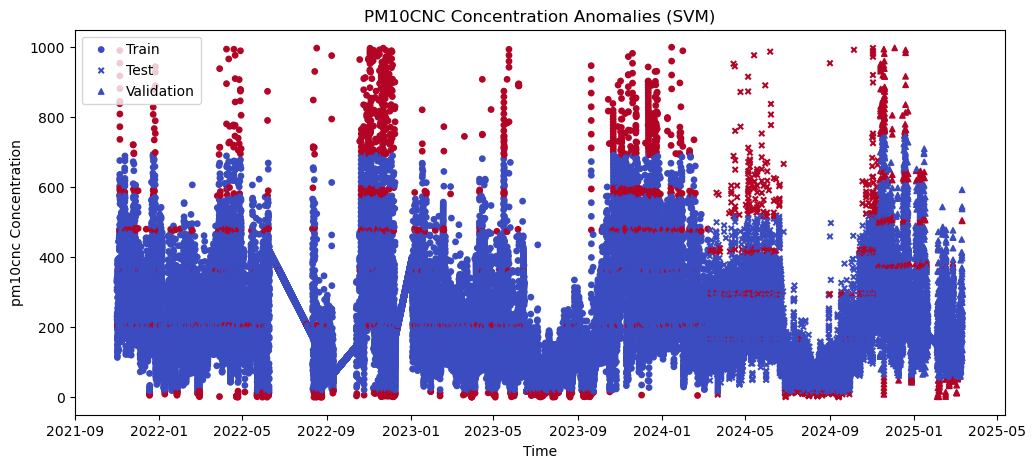

Train anomalies (pm10cnc): 1837
Test anomalies (pm10cnc): 542
Validation anomalies (pm10cnc): 282


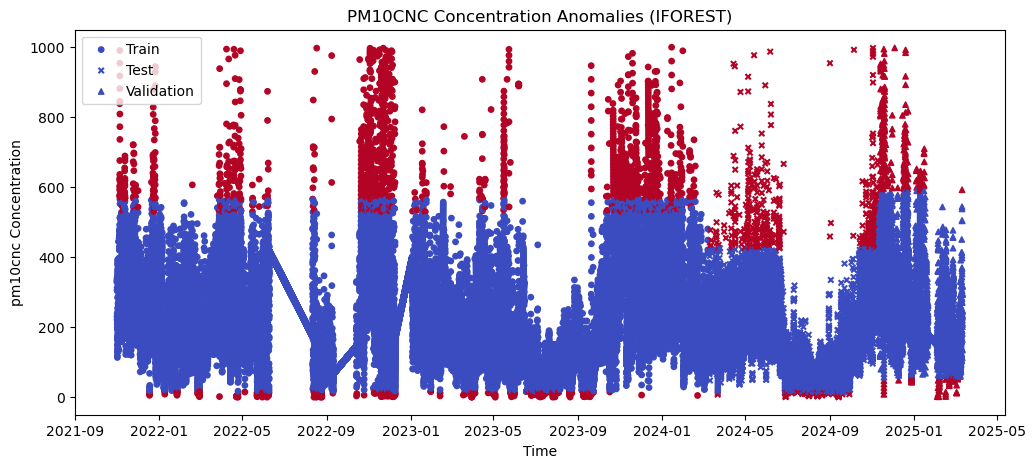

Train anomalies (pm10cnc): 2058
Test anomalies (pm10cnc): 589
Validation anomalies (pm10cnc): 295


In [40]:
# df25svm = process_and_plot_anomalies(df, model_type="svm", pollutant="pm2.5cnc")
# df10svm = process_and_plot_anomalies(df,model_type = "svm",pollutant="pm10cnc")
df10iforest = process_and_plot_anomalies(df, model_type="iforest", pollutant="pm10cnc")
# df25iforest = process_and_plot_anomalies(df,model_type="iforest",pollutant="pm2.5cnc")